                     Date    Hs      2      3     4     5     6      7      8  \
0     2009-09-01 00:27:00  0.99  11.20  10.38  8.41  7.29  5.34   9.76  20.50   
1     2009-09-01 00:57:00  1.07  11.85  11.05  8.98  7.74  5.58  10.23  20.45   
2     2009-09-01 01:27:00  1.06  11.33  10.55  8.62  7.48  5.48  10.07  20.45   
3     2009-09-01 01:57:00  1.05  11.55  10.73  8.67  7.50  5.46   9.99  20.55   
4     2009-09-01 02:27:00  1.02  10.77  10.01  8.28  7.29  5.45   9.97  20.25   
...                   ...   ...    ...    ...   ...   ...   ...    ...    ...   
1435  2009-09-30 21:57:00  1.59   9.15   8.62  7.34  6.58  5.21   9.91  18.85   
1436  2009-09-30 22:27:00  1.68   9.34   8.89  7.74  6.99  5.51  10.53  18.90   
1437  2009-09-30 22:57:00  1.60   9.31   8.82  7.65  6.95  5.62  11.13  18.90   
1438  2009-09-30 23:27:00  1.70   9.22   8.80  7.84  7.24  5.98  12.11  18.95   
1439  2009-09-30 23:57:00  1.92   9.26   8.92  8.13  7.60  6.42  13.52  18.95   

        9   10  
0     7.0 

'\n    final_dat=pd.concat([final_dat,dat])\nfinal_dat.reset_index(inplace=True)\nfinal_dat=final_dat.sort_values(by="Date")\nax.plot(final_dat["Date"],final_dat["Hs"])\n#final_dat["Date"] = pd.to_datetime(dat["Date"])#, format="%Y/%m/%d %H:%M")\n#final_dat["Hs"]=final_dat["Hs"]/100\nfinal_dat[final_dat["Hs"] <= abnormal_min] = np.nan\nfinal_dat[final_dat["Hs"] >abnormal_max] = np.nan\n\n#dat.set_index("Observation Time (UTC)", inplace=True)\nfinal_dat[\'rolling_mean\'] = final_dat["Hs"].rolling(window=window, center=True).mean()\nfinal_dat[\'diff\'] = np.abs(final_dat["Hs"] - final_dat[\'rolling_mean\'])\nthreshold = 0.1\ndat_cleaned = final_dat[final_dat[\'diff\'] <= threshold]\nax.plot(dat_cleaned["Date"],dat_cleaned["Hs"])\n'

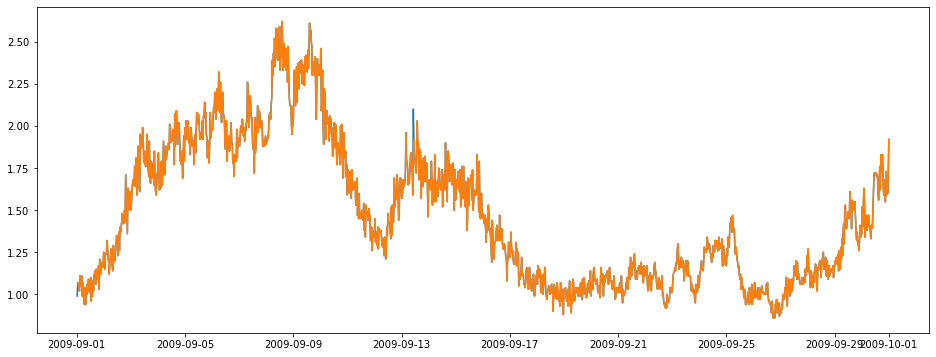

In [4]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import glob
#final_dat=pd.DataFrame()
window=2
threshold = 0.2
abnormal_max=2
abnormal_min=0
files = glob.glob("*.his")
for file in files:
    fig, ax = plt.subplots(figsize=(16, 6))
    dat=pd.read_csv(file,header=None)
    dat=dat.rename(columns={0:"Date",1:"Hs"})
    print(dat)
    dat["Date"]=pd.to_datetime(dat["Date"])
    ax.plot(dat["Date"],dat["Hs"])
    final_dat=dat
    #dat.set_index("Observation Time (UTC)", inplace=True)
    dat['rolling_mean'] = dat["Hs"].rolling(window=window, center=True).mean()
    dat['diff'] = np.abs(dat["Hs"] - dat['rolling_mean'])
    dat = dat[dat['diff'] <= threshold]
    
    ax.plot(dat["Date"],dat["Hs"])
    
'''
    final_dat=pd.concat([final_dat,dat])
final_dat.reset_index(inplace=True)
final_dat=final_dat.sort_values(by="Date")
ax.plot(final_dat["Date"],final_dat["Hs"])
#final_dat["Date"] = pd.to_datetime(dat["Date"])#, format="%Y/%m/%d %H:%M")
#final_dat["Hs"]=final_dat["Hs"]/100
final_dat[final_dat["Hs"] <= abnormal_min] = np.nan
final_dat[final_dat["Hs"] >abnormal_max] = np.nan

#dat.set_index("Observation Time (UTC)", inplace=True)
final_dat['rolling_mean'] = final_dat["Hs"].rolling(window=window, center=True).mean()
final_dat['diff'] = np.abs(final_dat["Hs"] - final_dat['rolling_mean'])
threshold = 0.1
dat_cleaned = final_dat[final_dat['diff'] <= threshold]
ax.plot(dat_cleaned["Date"],dat_cleaned["Hs"])
'''